In [1]:
import pandas as pd
import gc

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.ticker as ticker

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

### 데이터 확인

In [2]:
df1 = pd.read_parquet(r'data/train/7.마케팅정보/201807_train_.parquet')
df2 = pd.read_parquet(r'data/train/7.마케팅정보/201808_train_.parquet')
df3 = pd.read_parquet(r'data/train/7.마케팅정보/201809_train_.parquet')
df4 = pd.read_parquet(r'data/train/7.마케팅정보/201810_train_.parquet')
df5 = pd.read_parquet(r'data/train/7.마케팅정보/201811_train_.parquet')
df6 = pd.read_parquet(r'data/train/7.마케팅정보/201812_train_.parquet')
df7 = pd.read_parquet(r'data/test/7.마케팅정보/201807_test_.parquet')
df8 = pd.read_parquet(r'data/test/7.마케팅정보/201808_test_.parquet')
df9 = pd.read_parquet(r'data/test/7.마케팅정보/201809_test_.parquet')
df10 = pd.read_parquet(r'data/test/7.마케팅정보/201810_test_.parquet')
df11 = pd.read_parquet(r'data/test/7.마케팅정보/201811_test_.parquet')
df12 = pd.read_parquet(r'data/test/7.마케팅정보/201812_test_.parquet')

In [3]:
all_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
all_df.reset_index(inplace=True, drop=True)
all_df

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_카드론_당사앱_R6M,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15회 이상,10일 이상
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
2999996,201812,TEST_99996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
2999997,201812,TEST_99997,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
2999998,201812,TEST_99998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5회 이상,5일 이상


In [5]:
print(all_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 64 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   기준년월               int64 
 1   ID                 object
 2   컨택건수_카드론_TM_B0M    int64 
 3   컨택건수_리볼빙_TM_B0M    int64 
 4   컨택건수_CA_TM_B0M     int64 
 5   컨택건수_이용유도_TM_B0M   int64 
 6   컨택건수_신용발급_TM_B0M   int64 
 7   컨택건수_부대서비스_TM_B0M  int64 
 8   컨택건수_포인트소진_TM_B0M  int64 
 9   컨택건수_보험_TM_B0M     int64 
 10  컨택건수_카드론_LMS_B0M   int64 
 11  컨택건수_CA_LMS_B0M    int64 
 12  컨택건수_리볼빙_LMS_B0M   int64 
 13  컨택건수_이용유도_LMS_B0M  int64 
 14  컨택건수_카드론_EM_B0M    int64 
 15  컨택건수_CA_EM_B0M     int64 
 16  컨택건수_리볼빙_EM_B0M    int64 
 17  컨택건수_이용유도_EM_B0M   int64 
 18  컨택건수_카드론_청구서_B0M   int64 
 19  컨택건수_CA_청구서_B0M    int64 
 20  컨택건수_리볼빙_청구서_B0M   int64 
 21  컨택건수_이용유도_청구서_B0M  int64 
 22  컨택건수_카드론_인터넷_B0M   int64 
 23  컨택건수_CA_인터넷_B0M    int64 
 24  컨택건수_리볼빙_인터넷_B0M   int64 
 25  컨택건수_이용유도_인터넷_B0M  int64 
 26  컨택건수_카드론_당사앱_B

In [8]:
print(all_df.isna().sum().to_string())

기준년월                 0
ID                   0
컨택건수_카드론_TM_B0M      0
컨택건수_리볼빙_TM_B0M      0
컨택건수_CA_TM_B0M       0
컨택건수_이용유도_TM_B0M     0
컨택건수_신용발급_TM_B0M     0
컨택건수_부대서비스_TM_B0M    0
컨택건수_포인트소진_TM_B0M    0
컨택건수_보험_TM_B0M       0
컨택건수_카드론_LMS_B0M     0
컨택건수_CA_LMS_B0M      0
컨택건수_리볼빙_LMS_B0M     0
컨택건수_이용유도_LMS_B0M    0
컨택건수_카드론_EM_B0M      0
컨택건수_CA_EM_B0M       0
컨택건수_리볼빙_EM_B0M      0
컨택건수_이용유도_EM_B0M     0
컨택건수_카드론_청구서_B0M     0
컨택건수_CA_청구서_B0M      0
컨택건수_리볼빙_청구서_B0M     0
컨택건수_이용유도_청구서_B0M    0
컨택건수_카드론_인터넷_B0M     0
컨택건수_CA_인터넷_B0M      0
컨택건수_리볼빙_인터넷_B0M     0
컨택건수_이용유도_인터넷_B0M    0
컨택건수_카드론_당사앱_B0M     0
컨택건수_CA_당사앱_B0M      0
컨택건수_리볼빙_당사앱_B0M     0
컨택건수_이용유도_당사앱_B0M    0
컨택건수_카드론_TM_R6M      0
컨택건수_CA_TM_R6M       0
컨택건수_리볼빙_TM_R6M      0
컨택건수_이용유도_TM_R6M     0
컨택건수_신용발급_TM_R6M     0
컨택건수_부대서비스_TM_R6M    0
컨택건수_포인트소진_TM_R6M    0
컨택건수_보험_TM_R6M       0
컨택건수_카드론_LMS_R6M     0
컨택건수_CA_LMS_R6M      0
컨택건수_리볼빙_LMS_R6M     0
컨택건수_이용유도_LMS_R6M    0
컨택건수_카드론_EM_R6M      0
컨택건수_CA_EM_

### 기준년월
- 데이터 기준년월

### ID
- 고유 ID

### 컨택건수_카드론_TM_B0M
- 카드론 TM채널 마케팅 노출 건수 (당월)

In [12]:
all_df['컨택건수_카드론_TM_B0M'].value_counts().sort_index()

컨택건수_카드론_TM_B0M
0    2837983
2         27
3     149170
4      12820
Name: count, dtype: int64

### 컨택건수_리볼빙_TM_B0M
- 리볼빙 TM채널 마케팅 노출 건수 (당월)

In [13]:
all_df['컨택건수_리볼빙_TM_B0M'].value_counts().sort_index()

컨택건수_리볼빙_TM_B0M
0    2999985
1         10
2          5
Name: count, dtype: int64

In [16]:
df1['컨택건수_리볼빙_TM_B0M'].value_counts().sort_index()

컨택건수_리볼빙_TM_B0M
0    399990
1         7
2         3
Name: count, dtype: int64

In [17]:
df2['컨택건수_리볼빙_TM_B0M'].value_counts().sort_index()

컨택건수_리볼빙_TM_B0M
0    399999
2         1
Name: count, dtype: int64

In [18]:
df3['컨택건수_리볼빙_TM_B0M'].value_counts().sort_index()

컨택건수_리볼빙_TM_B0M
0    400000
Name: count, dtype: int64

In [19]:
df4['컨택건수_리볼빙_TM_B0M'].value_counts().sort_index()

컨택건수_리볼빙_TM_B0M
0    400000
Name: count, dtype: int64

In [20]:
df7['컨택건수_리볼빙_TM_B0M'].value_counts().sort_index()

컨택건수_리볼빙_TM_B0M
0    99999
1        1
Name: count, dtype: int64

In [21]:
df8['컨택건수_리볼빙_TM_B0M'].value_counts().sort_index()

컨택건수_리볼빙_TM_B0M
0    99999
2        1
Name: count, dtype: int64

### 컨택건수_CA_TM_B0M
- 현금서비스 TM채널 마케팅 노출 건수 (당월)

In [22]:
all_df['컨택건수_CA_TM_B0M'].value_counts().sort_index()

컨택건수_CA_TM_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_이용유도_TM_B0M
- 이용유도 TM채널 마케팅 노출 건수 (당월)

In [23]:
all_df['컨택건수_이용유도_TM_B0M'].value_counts().sort_index()

컨택건수_이용유도_TM_B0M
0    2918556
2       6037
3      75407
Name: count, dtype: int64

In [24]:
df1['컨택건수_이용유도_TM_B0M'].value_counts().sort_index()

컨택건수_이용유도_TM_B0M
0    392289
2      1602
3      6109
Name: count, dtype: int64

In [25]:
df6['컨택건수_이용유도_TM_B0M'].value_counts().sort_index()

컨택건수_이용유도_TM_B0M
0    389774
2       721
3      9505
Name: count, dtype: int64

### 컨택건수_신용발급_TM_B0M
- 신용발급 TM채널 마케팅 노출 건수 (당월)

In [26]:
all_df['컨택건수_신용발급_TM_B0M'].value_counts().sort_index()

컨택건수_신용발급_TM_B0M
0    2999992
1          8
Name: count, dtype: int64

### 컨택건수_부대서비스_TM_B0M
- 부대서비스 TM채널 마케팅 노출 건수 (당월)

In [27]:
all_df['컨택건수_부대서비스_TM_B0M'].value_counts().sort_index()

컨택건수_부대서비스_TM_B0M
0    2999999
1          1
Name: count, dtype: int64

### 컨택건수_포인트소진_TM_B0M
- 포인트소진 TM채널 마케팅 노출 건수 (당월)

In [28]:
all_df['컨택건수_포인트소진_TM_B0M'].value_counts().sort_index()

컨택건수_포인트소진_TM_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_보험_TM_B0M
- 보험 TM채널 마케팅 노출 건수 (당월)

In [29]:
all_df['컨택건수_보험_TM_B0M'].value_counts().sort_index()

컨택건수_보험_TM_B0M
0    2960541
1      39459
Name: count, dtype: int64

### 컨택건수_카드론_LMS_B0M
- 카드론 LMS채널 마케팅 노출 건수 (당월)

In [30]:
all_df['컨택건수_카드론_LMS_B0M'].value_counts().sort_index()

컨택건수_카드론_LMS_B0M
0    2987655
1      12345
Name: count, dtype: int64

### 컨택건수_CA_LMS_B0M
- 현금서비스 LMS채널 마케팅 노출 건수 (당월)

In [31]:
all_df['컨택건수_CA_LMS_B0M'].value_counts().sort_index()

컨택건수_CA_LMS_B0M
0    2999977
1          7
2         16
Name: count, dtype: int64

### 컨택건수_리볼빙_LMS_B0M
- 리볼빙 LMS채널 마케팅 노출 건수 (당월)

In [35]:
all_df['컨택건수_리볼빙_LMS_B0M'].value_counts().sort_index()

컨택건수_리볼빙_LMS_B0M
0    2999967
1         33
Name: count, dtype: int64

### 컨택건수_이용유도_LMS_B0M
- 이용유도 LMS채널 마케팅 노출 건수 (당월)

In [34]:
all_df['컨택건수_이용유도_LMS_B0M'].value_counts().sort_index()

컨택건수_이용유도_LMS_B0M
0    2050120
1       6055
2     880086
3      63739
Name: count, dtype: int64

### 컨택건수_카드론_EM_B0M
- 카드론 이메일 채널 마케팅 노출 건수 (당월)

In [36]:
all_df['컨택건수_카드론_EM_B0M'].value_counts().sort_index()

컨택건수_카드론_EM_B0M
0    2999835
1        165
Name: count, dtype: int64

### 컨택건수_CA_EM_B0M
- 현금서비스 이메일 채널 마케팅 노출 건수 (당월)

In [37]:
all_df['컨택건수_CA_EM_B0M'].value_counts().sort_index()

컨택건수_CA_EM_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_리볼빙_EM_B0M
- 리볼빙 이메일 채널 마케팅 노출 건수 (당월)

In [38]:
all_df['컨택건수_리볼빙_EM_B0M'].value_counts().sort_index()

컨택건수_리볼빙_EM_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_이용유도_EM_B0M
- 이용유도 이메일 채널 마케팅 노출 건수 (당월)

In [39]:
all_df['컨택건수_이용유도_EM_B0M'].value_counts().sort_index()

컨택건수_이용유도_EM_B0M
0     2073176
1      363051
2      126743
3       36558
4          17
5           7
6         271
7       24174
8       49890
9        5597
10       1297
11          5
12        130
13     319083
14          1
Name: count, dtype: int64

### 컨택건수_카드론_청구서_B0M
- 카드론 청구서 채널 마케팅 노출 건수 (당월)

In [40]:
all_df['컨택건수_카드론_청구서_B0M'].value_counts().sort_index()

컨택건수_카드론_청구서_B0M
0    2999918
1         82
Name: count, dtype: int64

### 컨택건수_CA_청구서_B0M
- 현금서비스 청구서 채널 마케팅 노출 건수 (당월)

In [41]:
all_df['컨택건수_CA_청구서_B0M'].value_counts().sort_index()

컨택건수_CA_청구서_B0M
0    2993308
2       6692
Name: count, dtype: int64

### 컨택건수_리볼빙_청구서_B0M
- 리볼빙 청구서 채널 마케팅 노출 건수 (당월)

In [43]:
all_df['컨택건수_리볼빙_청구서_B0M'].value_counts().sort_index()

컨택건수_리볼빙_청구서_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_이용유도_청구서_B0M
- 이용유도 청구서 채널 마케팅 노출 건수 (당월)

In [44]:
all_df['컨택건수_이용유도_청구서_B0M'].value_counts().sort_index()

컨택건수_이용유도_청구서_B0M
0    2115885
1     816354
2      67761
Name: count, dtype: int64

### 컨택건수_카드론_인터넷_B0M
- 카드론 홈페이지 채널 마케팅 노출 건수 (당월)

In [45]:
all_df['컨택건수_카드론_인터넷_B0M'].value_counts().sort_index()

컨택건수_카드론_인터넷_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_CA_인터넷_B0M
- 현금서비스 홈페이지 채널 마케팅 노출 건수 (당월)

In [46]:
all_df['컨택건수_CA_인터넷_B0M'].value_counts().sort_index()

컨택건수_CA_인터넷_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_리볼빙_인터넷_B0M
- 리볼빙 홈페이지 채널 마케팅 노출 건수 (당월)

In [47]:
all_df['컨택건수_리볼빙_인터넷_B0M'].value_counts().sort_index()

컨택건수_리볼빙_인터넷_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_이용유도_인터넷_B0M
- 이용유도 홈페이지 채널 마케팅 노출 건수 (당월)

In [48]:
all_df['컨택건수_이용유도_인터넷_B0M'].value_counts().sort_index()

컨택건수_이용유도_인터넷_B0M
0    2407184
1     592816
Name: count, dtype: int64

### 컨택건수_카드론_당사앱_B0M
- 카드론 모바일앱 채널 마케팅 노출 건수 (당월)

In [49]:
all_df['컨택건수_카드론_당사앱_B0M'].value_counts().sort_index()

컨택건수_카드론_당사앱_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_CA_당사앱_B0M
- 현금서비스 모바일앱 채널 마케팅 노출 건수 (당월)

In [50]:
all_df['컨택건수_CA_당사앱_B0M'].value_counts().sort_index()

컨택건수_CA_당사앱_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_리볼빙_당사앱_B0M
- 리볼빙 모바일앱 채널 마케팅 노출 건수 (당월)

In [51]:
all_df['컨택건수_리볼빙_당사앱_B0M'].value_counts().sort_index()

컨택건수_리볼빙_당사앱_B0M
0    3000000
Name: count, dtype: int64

### 컨택건수_이용유도_당사앱_B0M
- 이용유도 모바일앱 채널 마케팅 노출 건수 (당월)

In [52]:
all_df['컨택건수_이용유도_당사앱_B0M'].value_counts().sort_index()

컨택건수_이용유도_당사앱_B0M
0    2999931
1         50
2         18
4          1
Name: count, dtype: int64

### 컨택건수_카드론_TM_R6M
- 카드론 TM채널 마케팅 노출 건수 (최근6개월간)

In [53]:
all_df['컨택건수_카드론_TM_R6M'].value_counts().sort_index()

컨택건수_카드론_TM_R6M
0     2300021
1          92
2        1457
3       30679
4       51665
5       96232
6      119530
7       91369
8       65827
9       54885
10      36844
11      31828
12      35859
13      27689
14      23323
15      19268
16       6119
17       1261
18       3949
19        819
20        514
21        217
22        184
23        156
24        213
Name: count, dtype: int64

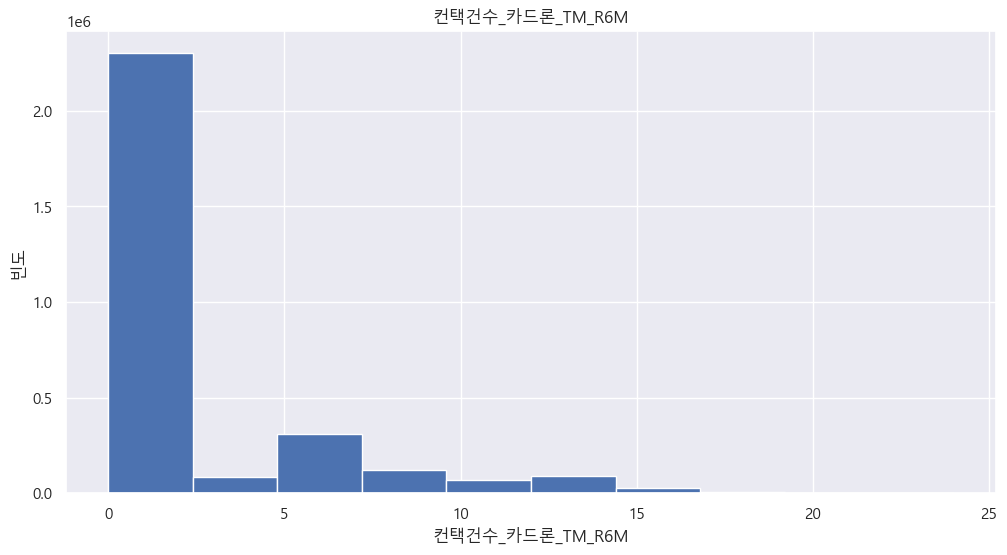

In [55]:
all_df['컨택건수_카드론_TM_R6M'].hist()
plt.xlabel('컨택건수_카드론_TM_R6M')
plt.ylabel('빈도')
plt.title('컨택건수_카드론_TM_R6M')
plt.show()

### 컨택건수_CA_TM_R6M
- 현금서비스 TM채널 마케팅 노출 건수 (최근6개월간)

In [56]:
all_df['컨택건수_CA_TM_R6M'].value_counts().sort_index()

컨택건수_CA_TM_R6M
0    2998181
1         60
2       1734
3         21
4          4
Name: count, dtype: int64

- 0건을 제외하고, 2건이 가장 많다.

### 컨택건수_리볼빙_TM_R6M
- 리볼빙 TM채널 마케팅 노출 건수 (최근6개월간)

In [66]:
all_df['컨택건수_리볼빙_TM_R6M'].value_counts().sort_index()

컨택건수_리볼빙_TM_R6M
0    2922682
1        581
2      76729
3          5
4          3
Name: count, dtype: int64

- 0

In [76]:
def plot_column_distribution(df, column_name):
    value_counts = df[column_name].value_counts().sort_index()
    print(value_counts)

    plt.figure(figsize=(8, 4))
    plt.bar(value_counts.index.astype(str), value_counts.values)
    plt.xlabel(column_name)
    plt.ylabel('빈도')
    plt.title(f'{column_name} 값 분포 (Bar Chart)')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### 컨택건수_이용유도_TM_R6M
- 이용유도 TM채널 마케팅 노출 건수 (최근6개월간)

컨택건수_이용유도_TM_R6M
0     1979660
1       78527
2      336567
3      273174
4      120588
5       81933
6       60672
7       30338
8       15470
9       11577
10       1766
11        678
12       3332
13        184
14        592
15       2565
16        139
17        469
18       1769
Name: count, dtype: int64


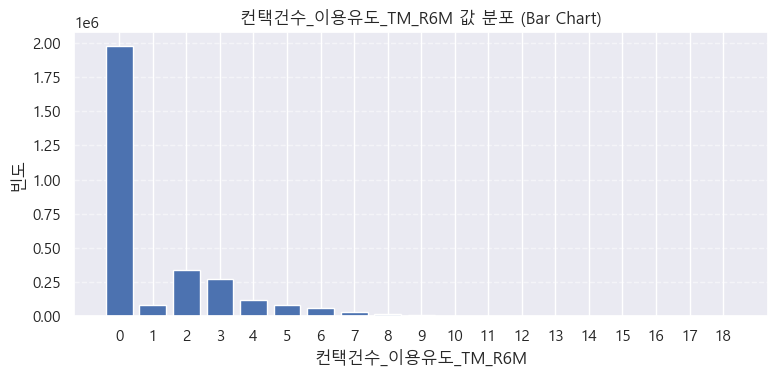

In [77]:
plot_column_distribution(all_df, '컨택건수_이용유도_TM_R6M')

### 컨택건수_신용발급_TM_R6M
- 신용발급 TM채널 마케팅 노출 건수 (최근6개월간)

컨택건수_신용발급_TM_R6M
0    2969861
1      30137
2          2
Name: count, dtype: int64


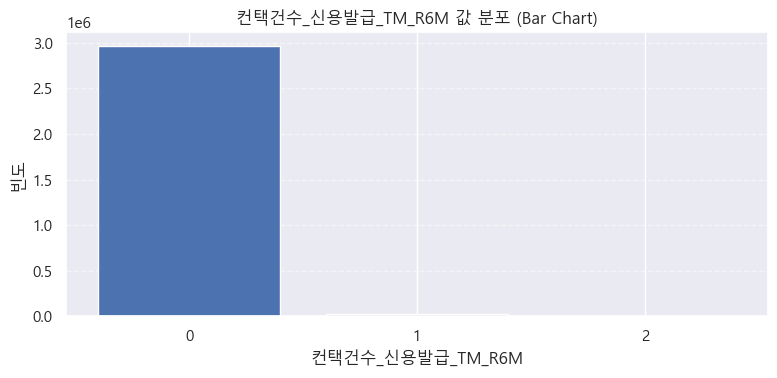

In [78]:
plot_column_distribution(all_df, '컨택건수_신용발급_TM_R6M')

### 컨택건수_부대서비스_TM_R6M
- 부대서비스 TM채널 마케팅 노출 건수 (최근6개월간)

컨택건수_부대서비스_TM_R6M
0    2916873
1          6
2      82196
3        925
Name: count, dtype: int64


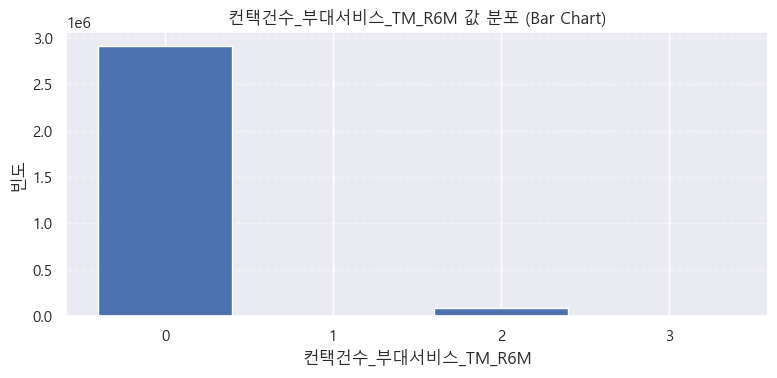

In [79]:
plot_column_distribution(all_df, '컨택건수_부대서비스_TM_R6M')

### 컨택건수_포인트소진_TM_R6M
- 포인트소진 TM채널 마케팅 노출 건수 (최근6개월간)

컨택건수_포인트소진_TM_R6M
0    2980617
1      19382
2          1
Name: count, dtype: int64


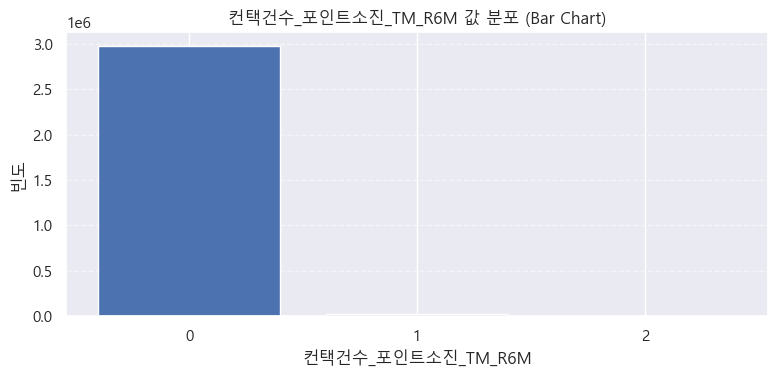

In [80]:
plot_column_distribution(all_df, '컨택건수_포인트소진_TM_R6M')

### 컨택건수_보험_TM_R6M
- 보험 TM채널 마케팅 노출 건수 (최근6개월간)

컨택건수_보험_TM_R6M
0    2209433
1     261337
2     343487
3     185488
4        226
5         28
6          1
Name: count, dtype: int64


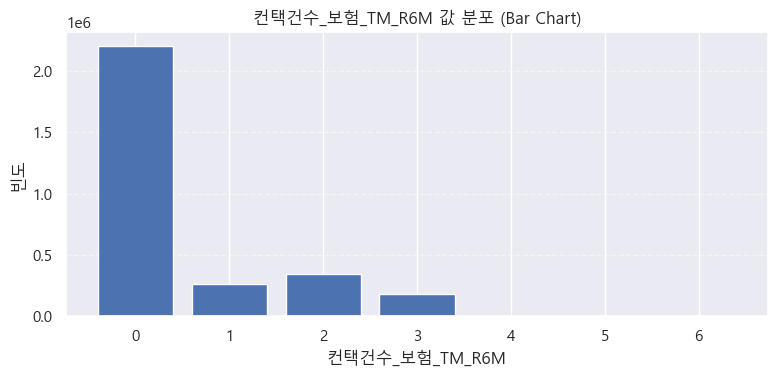

In [81]:
plot_column_distribution(all_df, '컨택건수_보험_TM_R6M')

### 컨택건수_카드론_LMS_R6M
- 카드론 LMS채널 마케팅 노출 건수 (최근6개월간)

컨택건수_카드론_LMS_R6M
0    2745319
1     238871
2      12420
3       2239
4        507
5        322
6        322
Name: count, dtype: int64


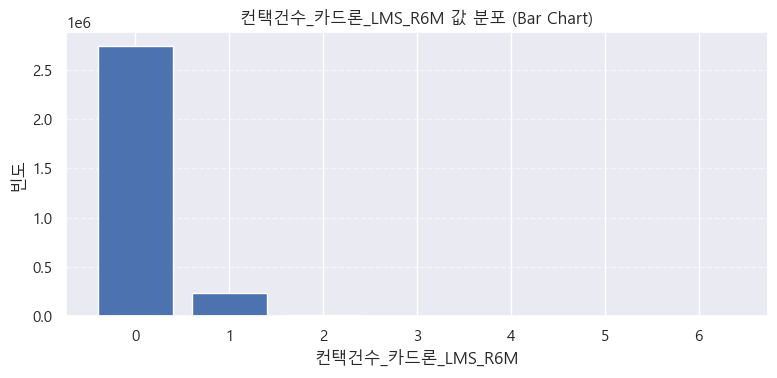

In [82]:
plot_column_distribution(all_df, '컨택건수_카드론_LMS_R6M')

### 컨택건수_CA_LMS_R6M
- 현금서비스 LMS채널 마케팅 노출 건수 (최근6개월간)

컨택건수_CA_LMS_R6M
0    2581914
1        235
2     417848
3          1
4          2
Name: count, dtype: int64


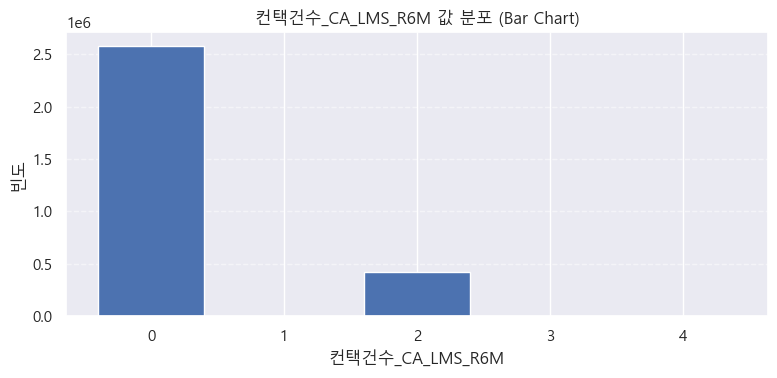

In [83]:
plot_column_distribution(all_df, '컨택건수_CA_LMS_R6M')

### 컨택건수_리볼빙_LMS_R6M
- 리볼빙 LMS채널 마케팅 노출 건수 (최근6개월간)

컨택건수_리볼빙_LMS_R6M
0    2989740
1       7148
2       3112
Name: count, dtype: int64


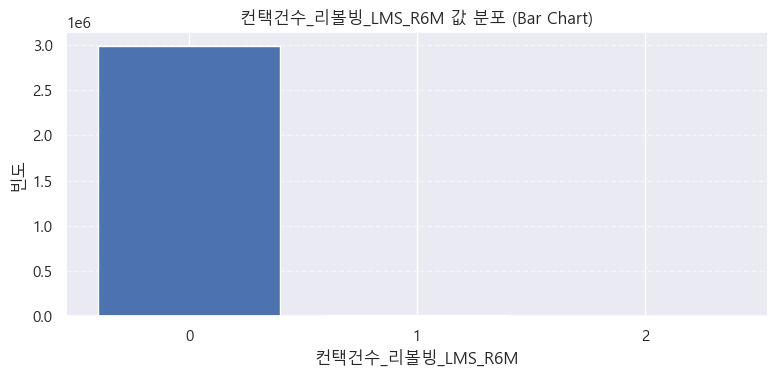

In [84]:
plot_column_distribution(all_df, '컨택건수_리볼빙_LMS_R6M')

### 컨택건수_이용유도_LMS_R6M
- 이용유도 LMS채널 마케팅 노출 건수 (최근6개월간)

컨택건수_이용유도_LMS_R6M
0     1385443
1      103418
2      159353
3      150340
4      176205
5      150381
6      155163
7      121222
8      120544
9       85690
10      92694
11      58030
12     125381
13      40859
14      29720
15      20994
16      13387
17       6967
18       3942
19        246
20         19
21          2
Name: count, dtype: int64


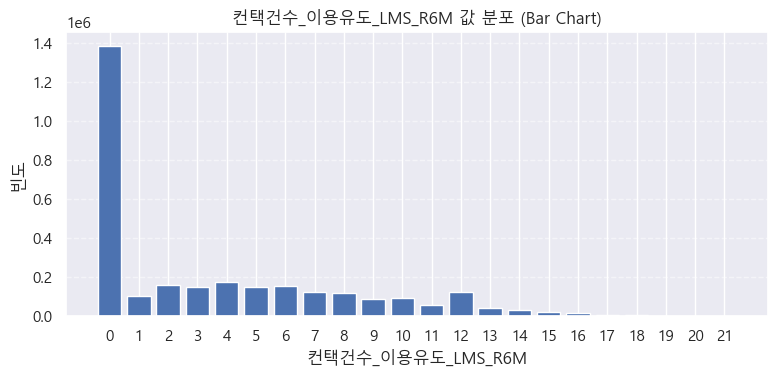

In [86]:
plot_column_distribution(all_df, '컨택건수_이용유도_LMS_R6M')

### 컨택건수_카드론_EM_R6M
- 카드론 이메일 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_카드론_EM_R6M
0    2961945
1      38031
2         22
3          2
Name: count, dtype: int64


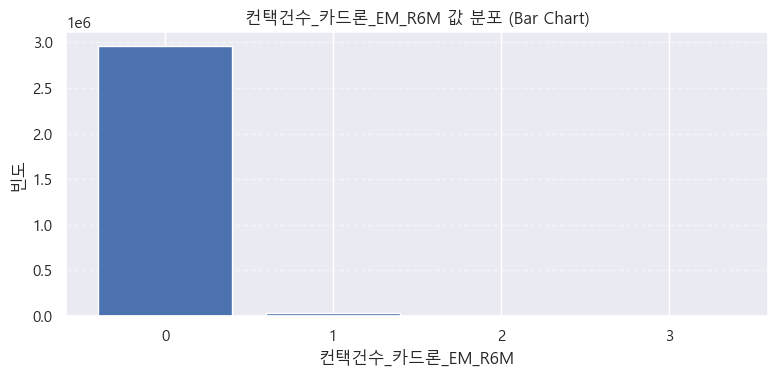

In [87]:
plot_column_distribution(all_df, '컨택건수_카드론_EM_R6M')

### 컨택건수_CA_EM_R6M
- 현금서비스 이메일 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_CA_EM_R6M
0    3000000
Name: count, dtype: int64


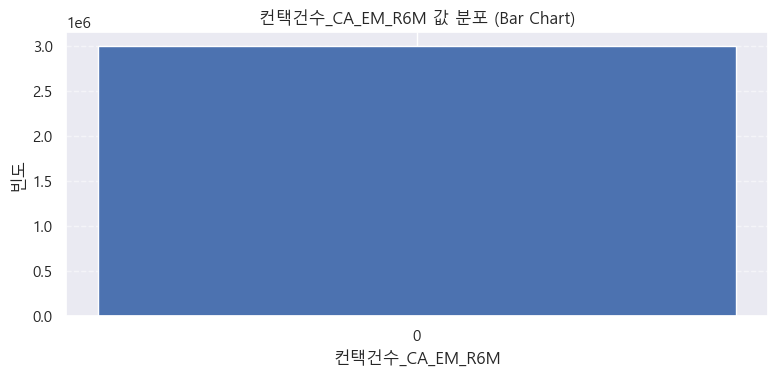

In [88]:
plot_column_distribution(all_df, '컨택건수_CA_EM_R6M')

### 컨택건수_리볼빙_EM_R6M
- 리볼빙 이메일 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_리볼빙_EM_R6M
0    3000000
Name: count, dtype: int64


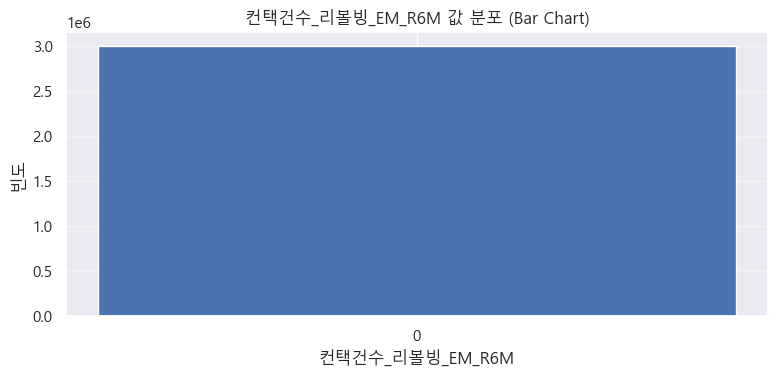

In [89]:
plot_column_distribution(all_df, '컨택건수_리볼빙_EM_R6M')

### 컨택건수_이용유도_EM_R6M
- 이용유도 이메일 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_이용유도_EM_R6M
0     835595
1     260331
2     232272
3     204161
4     168521
       ...  
75       385
76         2
77        66
78     31586
79         1
Name: count, Length: 80, dtype: int64


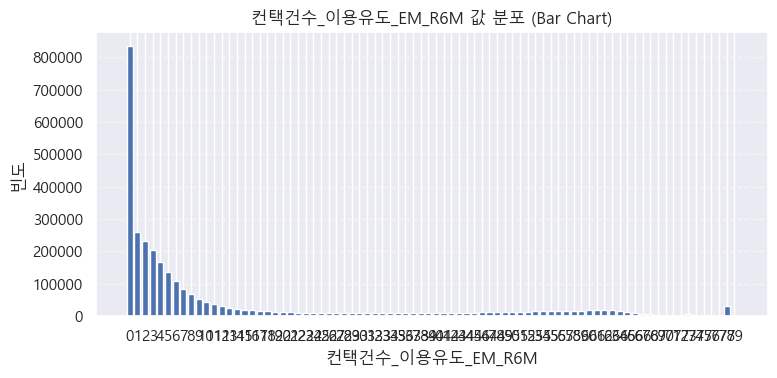

In [90]:
plot_column_distribution(all_df, '컨택건수_이용유도_EM_R6M')

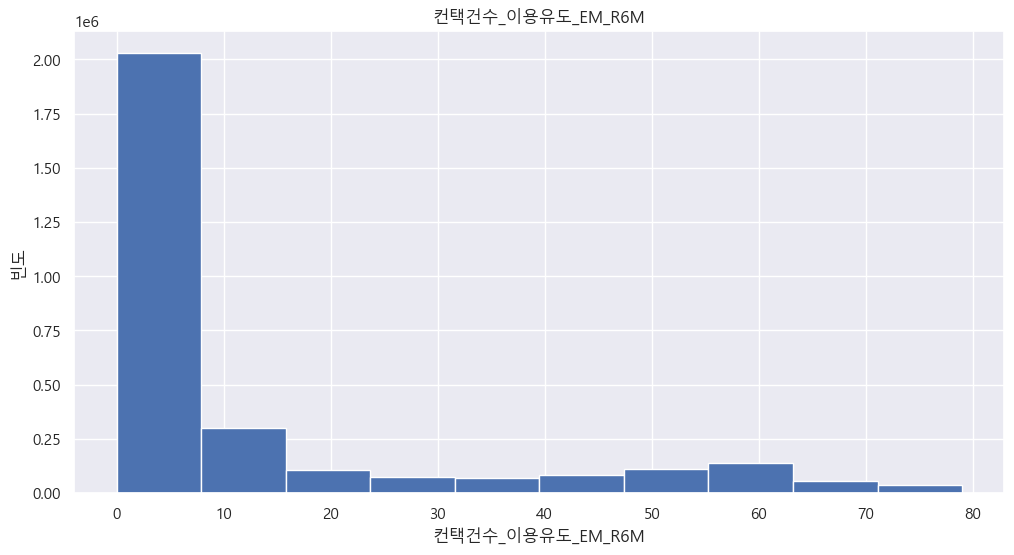

In [91]:
all_df['컨택건수_이용유도_EM_R6M'].hist()
plt.xlabel('컨택건수_이용유도_EM_R6M')
plt.ylabel('빈도')
plt.title('컨택건수_이용유도_EM_R6M')
plt.show()

### 컨택건수_카드론_청구서_R6M
- 카드론 청구서 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_카드론_청구서_R6M
0    2857412
1       5175
2     137413
Name: count, dtype: int64


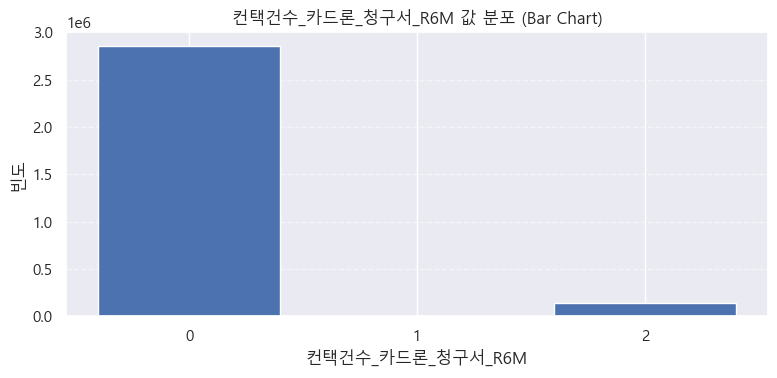

In [92]:
plot_column_distribution(all_df, '컨택건수_카드론_청구서_R6M')

### 컨택건수_CA_청구서_R6M
- 현금서비스 청구서 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_CA_청구서_R6M
0     2698499
2      299607
4        1152
6         353
8         177
10        128
12         84
Name: count, dtype: int64


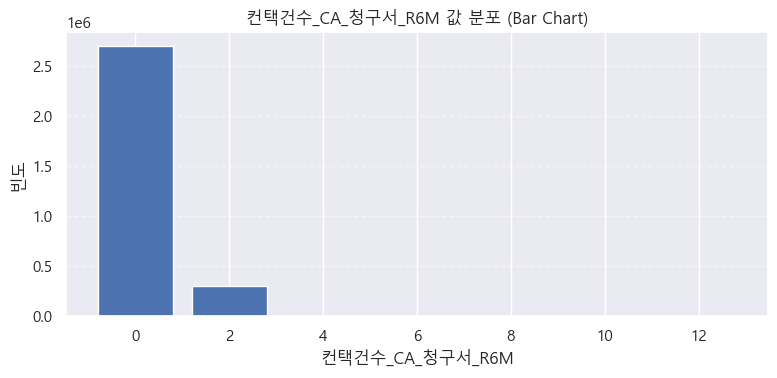

In [93]:
plot_column_distribution(all_df, '컨택건수_CA_청구서_R6M')

### 컨택건수_리볼빙_청구서_R6M
- 리볼빙 청구서 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_리볼빙_청구서_R6M
0    3000000
Name: count, dtype: int64


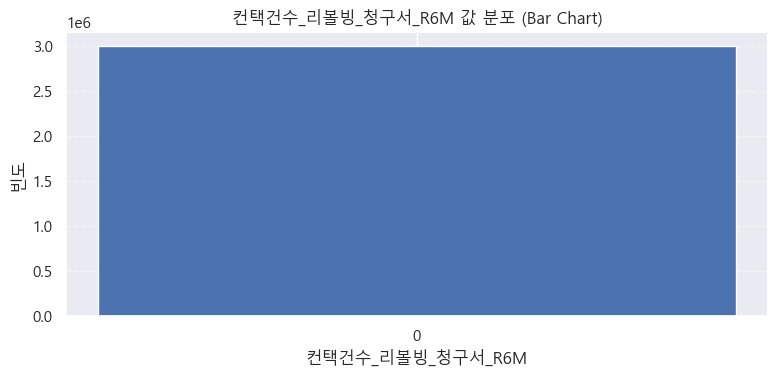

In [94]:
plot_column_distribution(all_df, '컨택건수_리볼빙_청구서_R6M')

### 컨택건수_이용유도_청구서_R6M
- 이용유도 청구서 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_이용유도_청구서_R6M
0     1452136
1      300843
2      228524
3       92248
4      462061
5      353017
6       66747
7         105
8        2219
9         127
10       5899
11      31961
12       4113
Name: count, dtype: int64


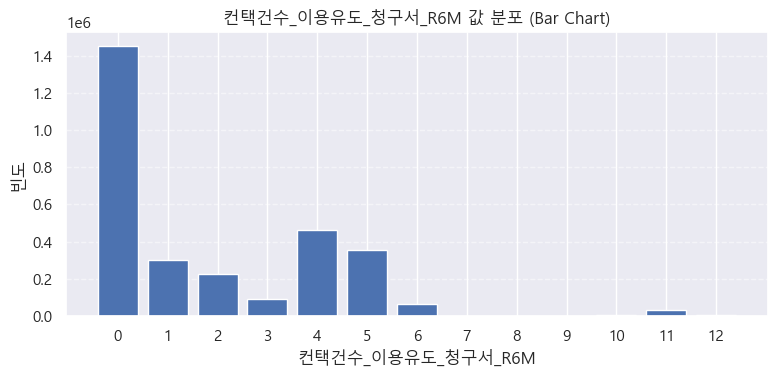

In [95]:
plot_column_distribution(all_df, '컨택건수_이용유도_청구서_R6M')

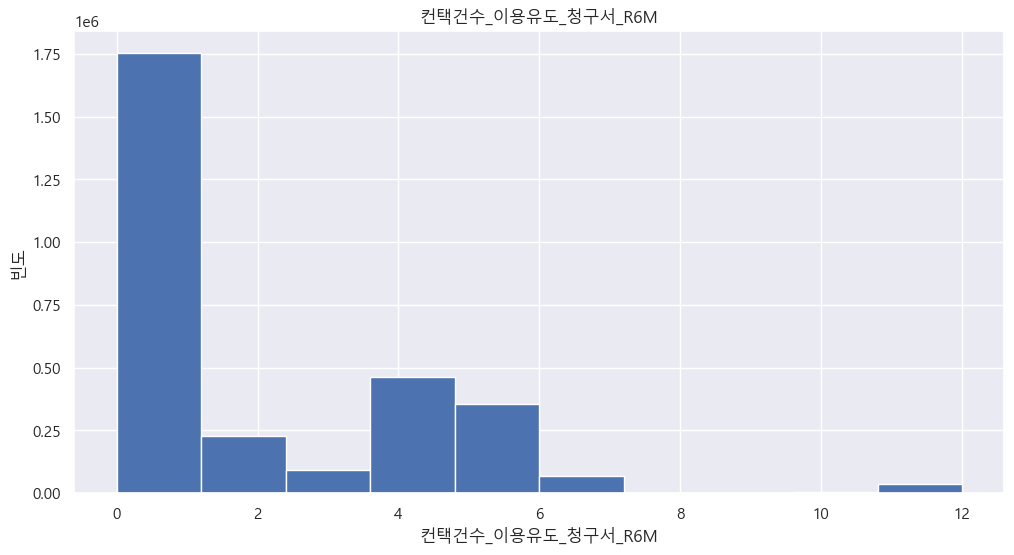

In [96]:
all_df['컨택건수_이용유도_청구서_R6M'].hist()
plt.xlabel('컨택건수_이용유도_청구서_R6M')
plt.ylabel('빈도')
plt.title('컨택건수_이용유도_청구서_R6M')
plt.show()

### 컨택건수_카드론_인터넷_R6M
- 카드론 홈페이지 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_카드론_인터넷_R6M
0    3000000
Name: count, dtype: int64


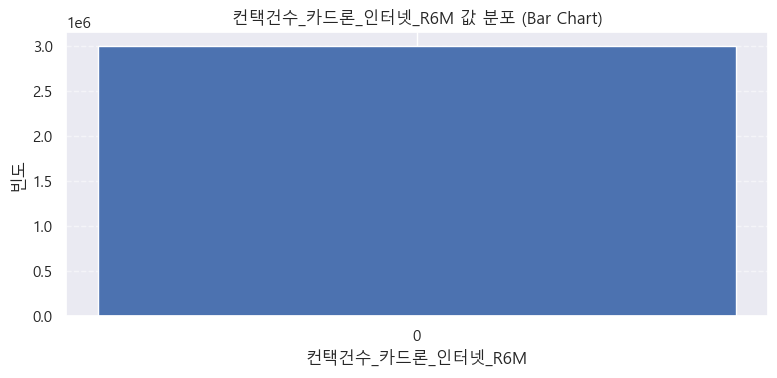

In [97]:
plot_column_distribution(all_df, '컨택건수_카드론_인터넷_R6M')

### 컨택건수_CA_인터넷_R6M
- 현금서비스 홈페이지 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_CA_인터넷_R6M
0    3000000
Name: count, dtype: int64


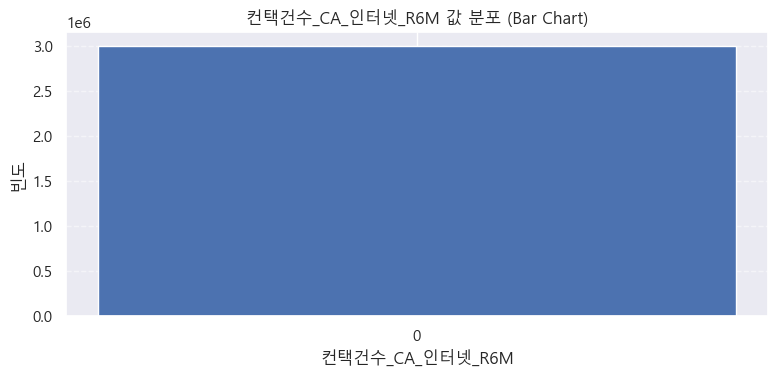

In [98]:
plot_column_distribution(all_df, '컨택건수_CA_인터넷_R6M')

### 컨택건수_리볼빙_인터넷_R6M
- 리볼빙 홈페이지 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_리볼빙_인터넷_R6M
0    3000000
Name: count, dtype: int64


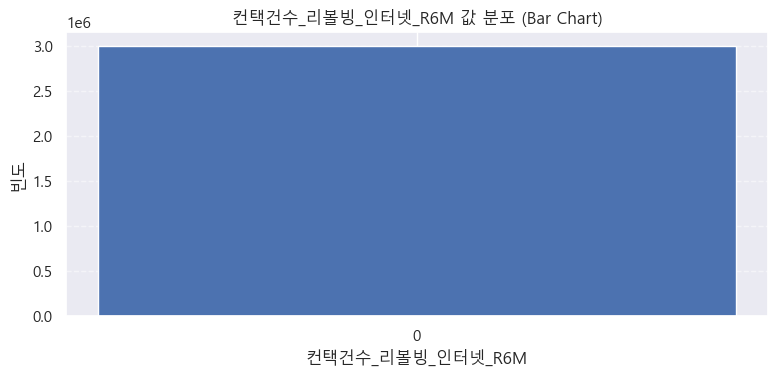

In [99]:
plot_column_distribution(all_df, '컨택건수_리볼빙_인터넷_R6M')

### 컨택건수_이용유도_인터넷_R6M
- 이용유도 홈페이지 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_이용유도_인터넷_R6M
0    997527
1    164780
2    394097
3    487923
4    421848
5    300051
6    166006
7     60183
8      7520
9        65
Name: count, dtype: int64


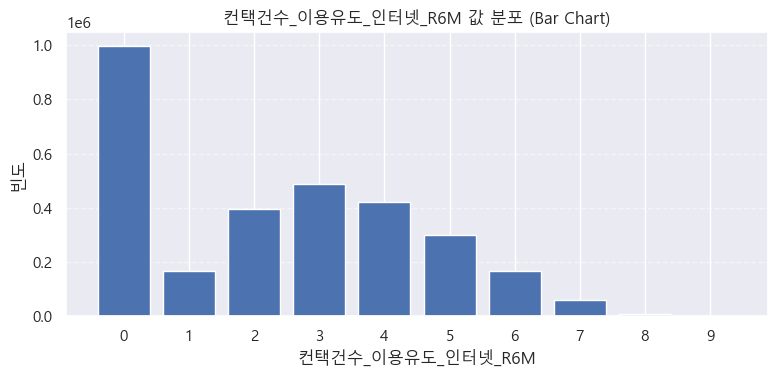

In [100]:
plot_column_distribution(all_df, '컨택건수_이용유도_인터넷_R6M')

### 컨택건수_카드론_당사앱_R6M
- 카드론 모바일앱 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_카드론_당사앱_R6M
0    3000000
Name: count, dtype: int64


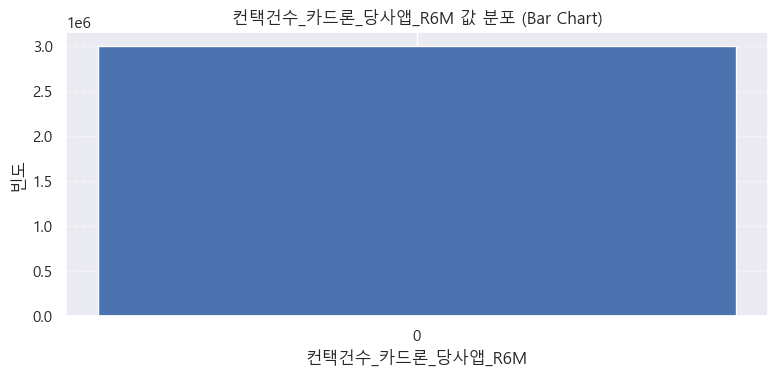

In [102]:
plot_column_distribution(all_df, '컨택건수_카드론_당사앱_R6M')

### 컨택건수_CA_당사앱_R6M
- 현금서비스 모바일앱 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_CA_당사앱_R6M
0    3000000
Name: count, dtype: int64


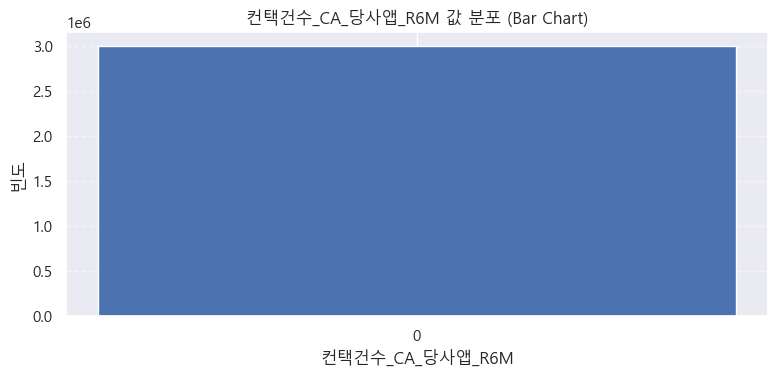

In [103]:
plot_column_distribution(all_df, '컨택건수_CA_당사앱_R6M')

### 컨택건수_이용유도_당사앱_R6M
- 이용유도 모바일앱 채널 마케팅 노출 건수 (최근6개월간)

컨택건수_이용유도_당사앱_R6M
0    2999269
1         44
2         19
3        629
4         39
Name: count, dtype: int64


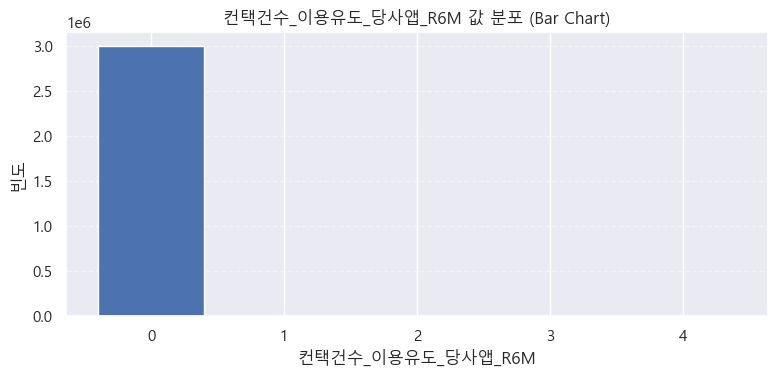

In [104]:
plot_column_distribution(all_df, '컨택건수_이용유도_당사앱_R6M')

### 컨택건수_채권_B0M
- 컨택건수 채권 (당월)

컨택건수_채권_B0M
0    2984455
4        649
5      10324
6       4087
7        477
8          8
Name: count, dtype: int64


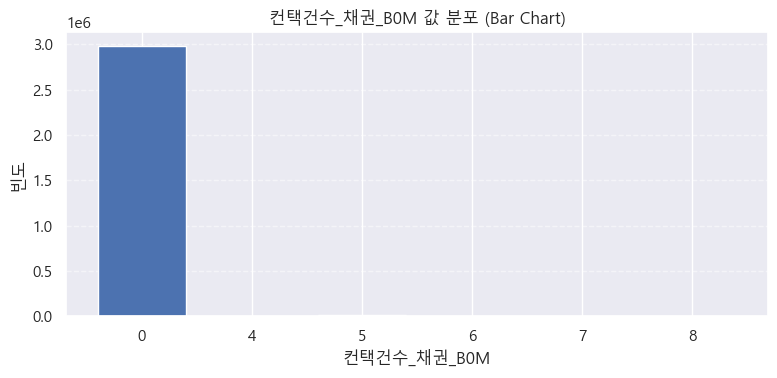

In [105]:
plot_column_distribution(all_df, '컨택건수_채권_B0M')

### 컨택건수_FDS_B0M
- 컨택건수 사기탐지거래 관련 (당월)

컨택건수_FDS_B0M
0    3000000
Name: count, dtype: int64


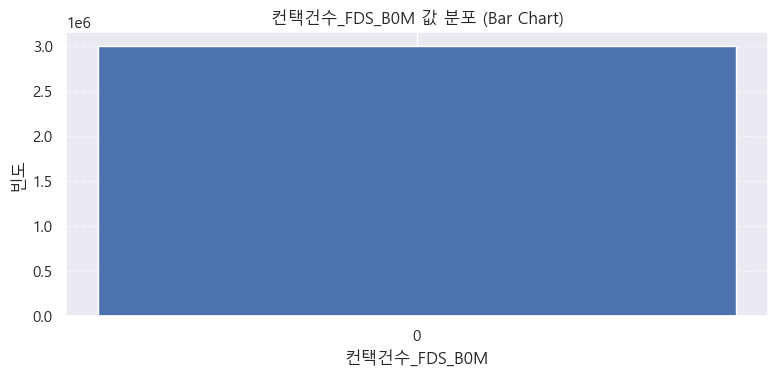

In [106]:
plot_column_distribution(all_df, '컨택건수_FDS_B0M')

### 컨택건수_채권_R6M
- 컨택건수 채권 관련 (최근6개월간)

컨택건수_채권_R6M
0     2830696
1          20
2         402
3        5385
4       27675
5       41109
6       32028
7       17730
8        9526
9        5877
10       4588
11       3163
12       2383
13       1820
14       1458
15       1458
16       1286
17       1168
18       1102
19        988
20       1055
21        993
22        932
23        922
24        988
25       1073
26        882
27        895
28        687
29        566
30        568
31        208
32        110
33         73
34         59
35         65
36         32
37         19
38          9
39          2
Name: count, dtype: int64


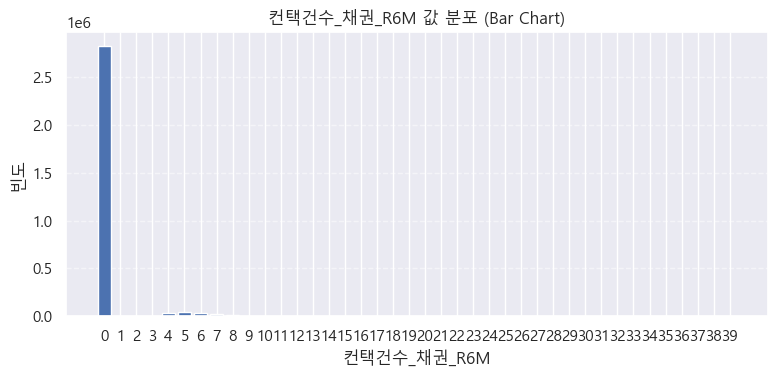

In [107]:
plot_column_distribution(all_df, '컨택건수_채권_R6M')

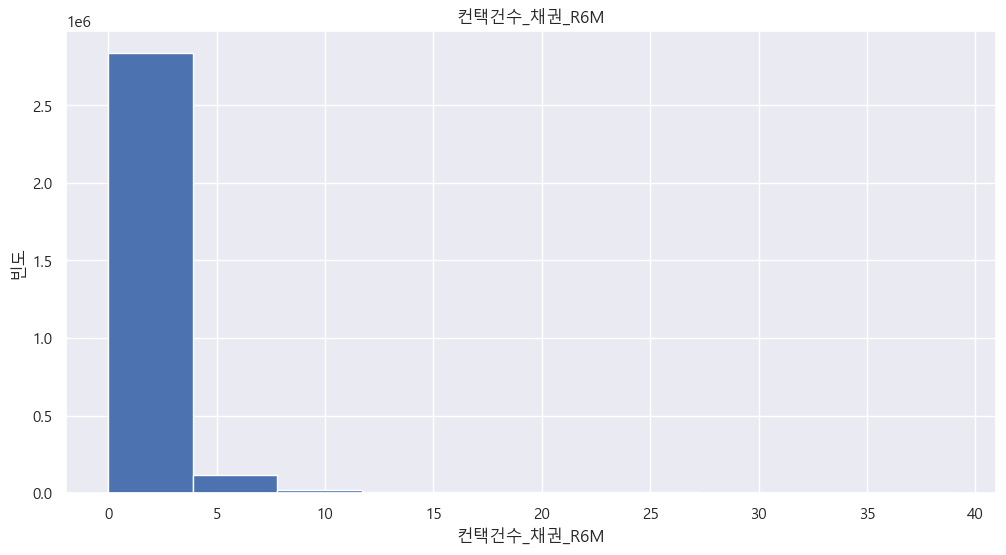

In [108]:
all_df['컨택건수_채권_R6M'].hist()
plt.xlabel('컨택건수_채권_R6M')
plt.ylabel('빈도')
plt.title('컨택건수_채권_R6M')
plt.show()

### 컨택건수_FDS_R6M
- 컨택건수 사기탐지거래 관련 (최근6개월간)

컨택건수_FDS_R6M
0    3000000
Name: count, dtype: int64


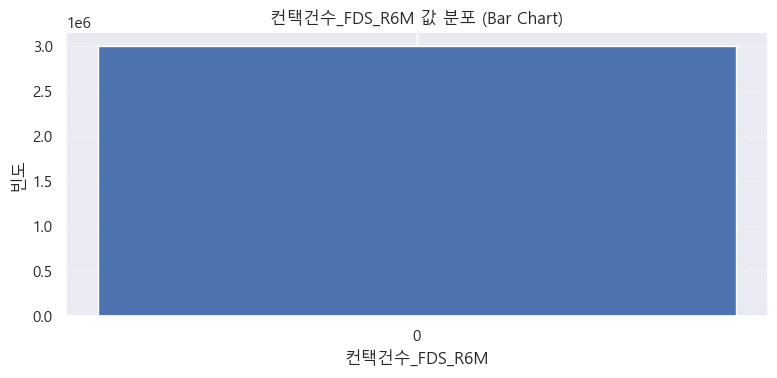

In [110]:
plot_column_distribution(all_df, '컨택건수_FDS_R6M')

### 캠페인접촉건수_R12M
- 캠페인 접촉건수 (최근12개월간)

캠페인접촉건수_R12M
10회 이상     182779
15회 이상     121423
1회 이상     2149514
20회 이상      78754
25회 이상          6
5회 이상      467524
Name: count, dtype: int64


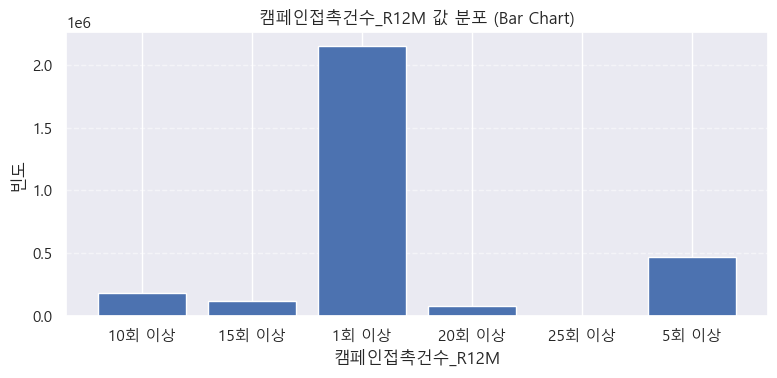

In [111]:
plot_column_distribution(all_df, '캠페인접촉건수_R12M')

### 캠페인접촉일수_R12M
- 캠페인 접촉일수 (최근12개월간)

캠페인접촉일수_R12M
10일 이상     177039
15일 이상     137584
1일 이상     2193109
20일 이상      35819
5일 이상      456449
Name: count, dtype: int64


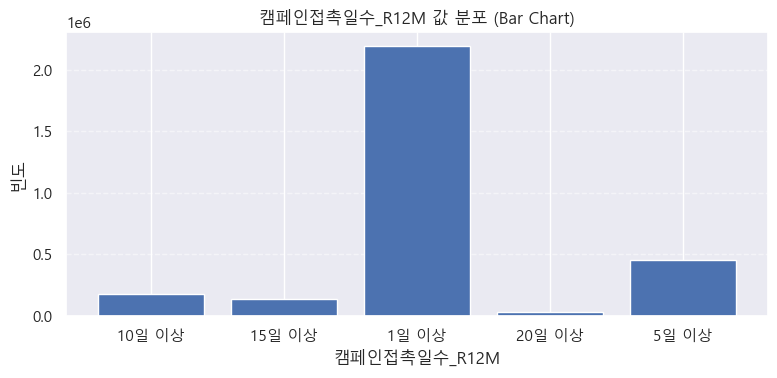

In [112]:
plot_column_distribution(all_df, '캠페인접촉일수_R12M')